### Data Import and Initial Inspection

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Load the dataset
coffee_data = pd.read_csv('coffee_sales.csv')

In [3]:
# Display the first few rows
print(coffee_data.head())

         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


In [4]:
# Check the dataset shape
print(coffee_data.shape)

(1133, 6)


In [8]:
# Get basic information about the dataset
print(coffee_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB
None


In [10]:
# Summary statistics
print(coffee_data.describe())

             money
count  1133.000000
mean     33.105808
std       5.035366
min      18.120000
25%      28.900000
50%      32.820000
75%      37.720000
max      40.000000


In [12]:
# Check data types
print(coffee_data.dtypes)


date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object


### Data Cleaning and Preprocessing

In [15]:
# Check for missing values
print(coffee_data.isnull().sum())

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


In [17]:
# Drop or fill missing values as appropriate
coffee_data.dropna(inplace=True) 

In [19]:
# Check for duplicates
coffee_data.drop_duplicates(inplace=True)

In [21]:
# Convert 'datetime' column to datetime format
coffee_data['datetime'] = pd.to_datetime(coffee_data['datetime'])

# Drop the 'date' column since 'datetime' contains both date and time
coffee_data.drop(columns=['date'], inplace=True)

# Fill missing values in 'money' column using the median
coffee_data['money'].fillna(coffee_data['money'].median(), inplace=True)

# Fill missing 'coffee_name' with the most frequent value (mode)
coffee_data['coffee_name'].fillna(coffee_data['coffee_name'].mode()[0], inplace=True)

# Handle missing values in 'cash_type' and 'card'
coffee_data['cash_type'].fillna(coffee_data['cash_type'].mode()[0], inplace=True)
coffee_data['card'].fillna('Unknown', inplace=True)  # Fill missing 'card' values with 'Unknown'


C:\Users\DELL\AppData\Local\Temp\ipykernel_5140\1340854722.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  coffee_data['money'].fillna(coffee_data['money'].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_5140\1340854722.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

### Outlier Detection Using Z-Score

In [24]:
# Outlier Detection Using Z-Score
import pandas as pd
from scipy.stats import zscore
z_scores = np.abs(zscore(coffee_data[['money']]))
coffee_data_cleaned = coffee_data[(z_scores < 3).all(axis=1)]


# Feature Engineering

In [27]:
# Extract relevant features from 'datetime'
coffee_data_cleaned['Month'] = coffee_data_cleaned['datetime'].dt.month
coffee_data_cleaned['Year'] = coffee_data_cleaned['datetime'].dt.year
coffee_data_cleaned['Day'] = coffee_data_cleaned['datetime'].dt.day
coffee_data_cleaned['Hour'] = coffee_data_cleaned['datetime'].dt.hour


### One-hot encoding for categorical variables

In [30]:
# One-hot encoding for categorical variables
coffee_data_cleaned = pd.get_dummies(coffee_data_cleaned, drop_first=True)

# Now coffee_data_cleaned is defined and ready for further processing
print("Data cleaned and one-hot encoded successfully.")

print(coffee_data_cleaned.head())


Data cleaned and one-hot encoded successfully.
                 datetime  money  Month  Year  Day  Hour  \
0 2024-03-01 10:15:50.520   38.7      3  2024    1    10   
1 2024-03-01 12:19:22.539   38.7      3  2024    1    12   
2 2024-03-01 12:20:18.089   38.7      3  2024    1    12   
3 2024-03-01 13:46:33.006   28.9      3  2024    1    13   
4 2024-03-01 13:48:14.626   38.7      3  2024    1    13   

   card_ANON-0000-0000-0002  card_ANON-0000-0000-0003  \
0                     False                     False   
1                      True                     False   
2                      True                     False   
3                     False                      True   
4                     False                     False   

   card_ANON-0000-0000-0004  card_ANON-0000-0000-0005  ...  \
0                     False                     False  ...   
1                     False                     False  ...   
2                     False                     False  ...   
3

In [32]:
 #**Remove Irrelevant Features (e.g., card details)**
irrelevant_features = [col for col in coffee_data_cleaned.columns if 'card_' in col]
coffee_data_cleaned.drop(columns=irrelevant_features, inplace=True)

### Scale numerical features

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['money', 'Month', 'Year', 'Day', 'Hour']
coffee_data_cleaned[numerical_cols] = scaler.fit_transform(coffee_data_cleaned[numerical_cols])



# Exploratory Data Analysis (EDA)

### Visualize sales trends and distributions:

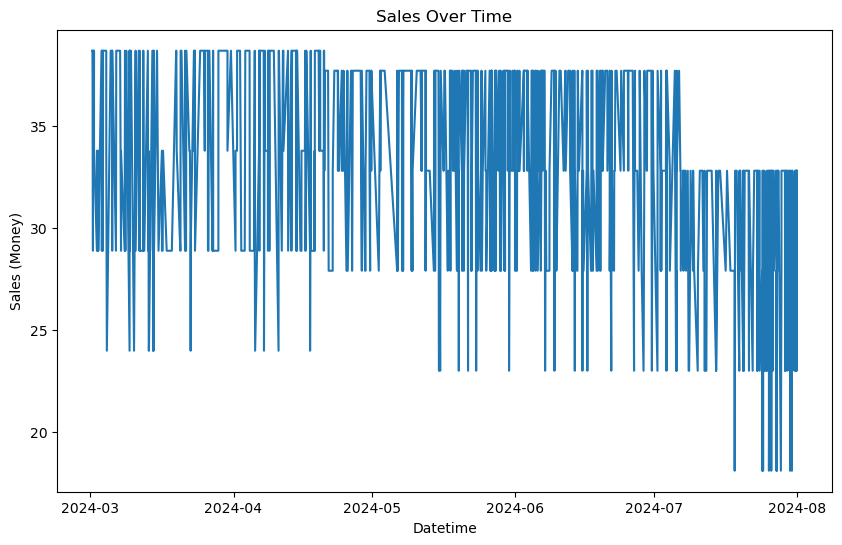

In [39]:
# Sales over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=coffee_data, x='datetime', y='money')  # Corrected to use 'datetime'
plt.title('Sales Over Time')
plt.xlabel('Datetime')
plt.ylabel('Sales (Money)')
plt.show()


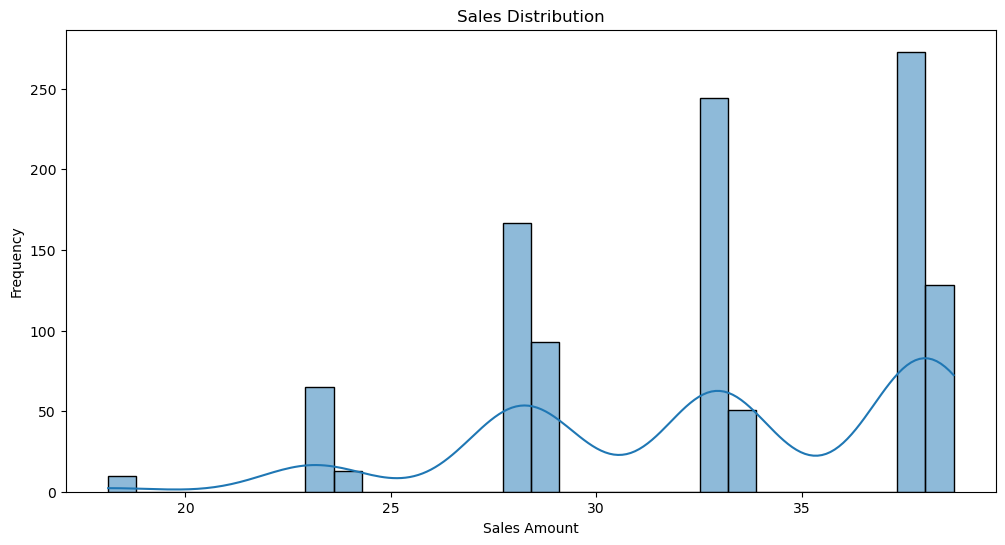

In [41]:
# Distribution of sales
plt.figure(figsize=(12, 6))
sns.histplot(coffee_data['money'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_5140\3432280625.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coffee_data, x='coffee_name', y='money', palette='viridis')


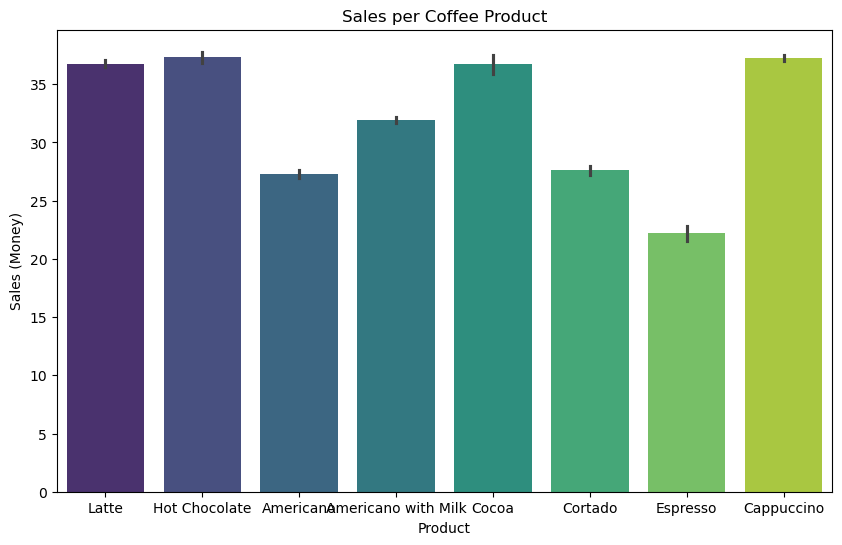

In [43]:
# Sales by product
plt.figure(figsize=(10, 6))
sns.barplot(data=coffee_data, x='coffee_name', y='money', palette='viridis')
plt.title('Sales per Coffee Product')
plt.xlabel('Product')
plt.ylabel('Sales (Money)')
plt.show()

# Machine Learning Model: Random Forest

In [46]:

# Define features and target variable
X = coffee_data_cleaned.drop(columns=['money', 'datetime'])  # Exclude 'money' and 'datetime'
y = coffee_data_cleaned['money']  # Dependent variable (target)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.0020256381137200253
R^2 Score: 0.9978885186962118


In [48]:
## Model Interpretation (Feature Importance)
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(10))

                            Feature  Importance
8              coffee_name_Espresso    0.183026
5            coffee_name_Cappuccino    0.165973
0                             Month    0.156443
10                coffee_name_Latte    0.141747
9         coffee_name_Hot Chocolate    0.108369
4   coffee_name_Americano with Milk    0.085413
6                 coffee_name_Cocoa    0.074502
7               coffee_name_Cortado    0.056017
2                               Day    0.025725
3                              Hour    0.002784


### Feature Importance Explanation:
The Random Forest model identified several key features that significantly influence coffee sales. The most important features are as follows:

1. **Coffee Type**:
   - Espresso and Cappuccino are the top predictors, indicating that these products drive sales effectively.
   - Latte, Hot Chocolate, and Americano with Milk also play significant roles in predicting sales.

2. **Month**:
   - The month of the year is crucial for understanding seasonal trends in coffee sales, showing that sales patterns can vary throughout the year.

3. **Other Features**:
   - Day and Hour of the day have some influence on sales but are less significant compared to coffee types and month.

Overall, the model demonstrates that product choice and seasonal factors are the primary drivers of coffee sales.

